In [22]:
# for data manupulation
import pandas as pd
import numpy as np
import random as rnd

## for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for model development
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
titanic_train_data = pd.read_csv('./train.csv')
titanic_test_data = pd.read_csv('./test.csv')

In [20]:
print(titanic_train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [52]:
combined = [titanic_train_data,titanic_test_data]

In [25]:
titanic_train_data.info()
print("_"*40)
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [26]:
titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
titanic_train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hassab, Mr. Hammad",male,347082,B96 B98,S
freq,1,577,7,4,644


In [37]:
titanic_train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [40]:
titanic_train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


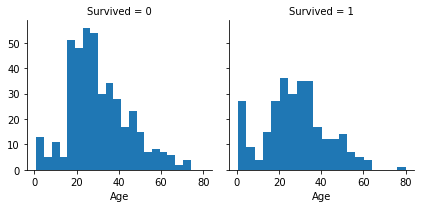

In [43]:
g = sns.FacetGrid(titanic_train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

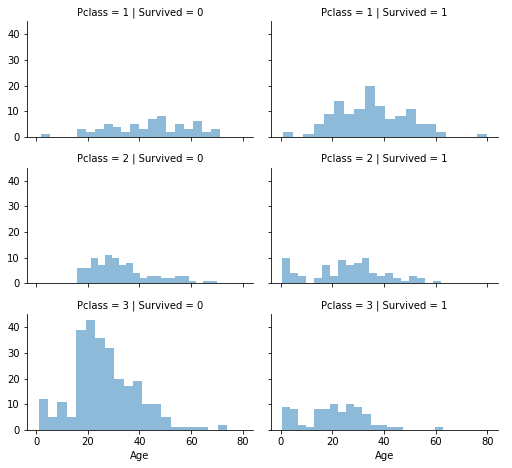

In [45]:
grid = sns.FacetGrid(titanic_train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\ibad.siddiqui\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ibad.siddiqui\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


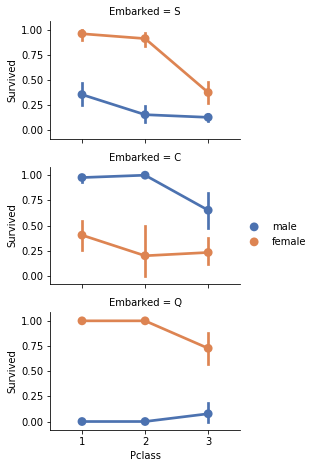

In [47]:
grid = sns.FacetGrid(titanic_train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\ibad.siddiqui\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ibad.siddiqui\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


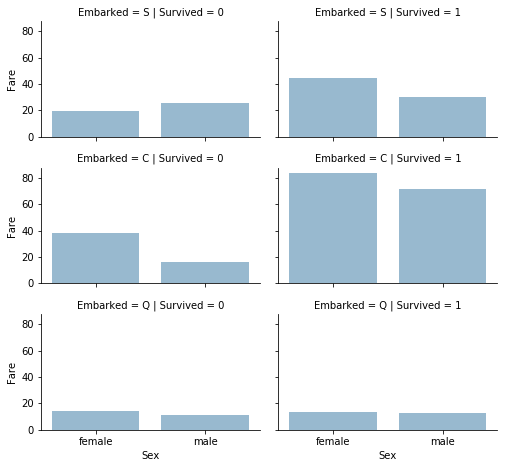

In [49]:
grid = sns.FacetGrid(titanic_train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [54]:
print("Before", titanic_train_data.shape, titanic_test_data.shape, combined[0].shape, combined[1].shape)

train_df = titanic_train_data.drop(['Ticket', 'Cabin'], axis=1)
test_df = titanic_test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [titanic_train_data, titanic_test_data]

"After", titanic_train_data.shape, titanic_test_data.shape, combined[0].shape, combined[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 12), (418, 11), (891, 12), (418, 11))